## Data & module Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googletrans import Translator
import googletrans
%matplotlib inline

In [2]:
df_train = pd.read_csv('sales_train.csv.gz',)
df_test = pd.read_csv('test.csv.gz')
df_items = pd.read_csv('items.csv')
df_item_categories = pd.read_csv('item_categories.csv')
df_shop = pd.read_csv('shops.csv')
df_sample_submission = pd.read_csv('sample_submission.csv.gz')

## Data shape & structure
###  df_train
* date : 2013년 2월 부터 2015년 10월 까지
* date_block_num : 2013년 1월 부터 2015년 12월 까지 순서대로(0~33)
* shop_id
* item_price
* item_cnt_day : 판매량(마이너스 경우 반품), train의 Y값


* shape : (2935849, 6)
* 수치형 : item_price, item_cnt_day // 카테고리형 : date, date_block_num, shop_id, itme_id


### df_test
* ID : Key index
* shop_id
* item_id


* shape : (214200, 3)
* Target : item_cnt_day

In [3]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


### 가게의 상품 월별 매출

In [4]:
np.sort(df_train['shop_id'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

In [5]:
df_train['shop_id'].unique().shape #Train 데이터의 shop ID 수 60

(60,)

In [6]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
np.sort(df_test['shop_id'].unique())

array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
       26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 55, 56, 57, 58, 59], dtype=int64)

In [8]:
df_test['shop_id'].unique().shape # Test 데이터의 shop ID 수 42

(42,)

* 1, 8, 9, 11, 13, 17, 20, 23, 27, 32, 40, 43, 51, 54 가게 test에 없음

In [9]:
df_items.head() # item_name이 키릴 문자로 변환 해서 지역명을 볼 수 있도록 하겠음

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [10]:
translator = Translator()

In [11]:
a = translator.translate(df_items['item_name'][0],dest='en')
print (a)
print(a.text)

Translated(src=ru, dest=en, text=!! IN THE POWER OF HAPPINESS (PLAST) D, pronunciation=None)
!! IN THE POWER OF HAPPINESS (PLAST) D


### 키릴 문자 변환(함수 생성)

In [12]:
# translator = Translator()
# trans_ranguage = lambda x : ((translator.translate(x, dest='en')).text) #람다는 한번 쓰면 끝?

In [13]:
def russian_translate(series):
    translator = Translator()
    translate = lambda x : ((translator.translate(x, dest='en',src='ru')).text)
    value = np.array(list(map(translate,series.values)))
    return np.reshape(value,(-1,1))
    #칼럼의 시리즈를 받아서
    #해당 시리즈에 맞는 넘파이 어레이로 반환

In [14]:
df_item_categories['item_category_name']= russian_translate(df_item_categories['item_category_name'])
df_shop['shop_name']=russian_translate(df_shop['shop_name'])

# df_items['item_name']=russian_translate(df_items['item_name'])
# JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [15]:
df_item_categories.head()

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [16]:
# list(map(trans_ranguage,np.reshape( df_item_categories['item_category_name'].values, (-1,1))))
# np.array(list(map(trans_ranguage,np.reshape (df_items_trans_test['item_name'].values,(-1,1))))) # 이방식으로 할거
# df_items_trans_test.head()

# np.array(list(map(trans_ranguage,df_item_categories['item_category_name'].values)))

In [17]:
df_item_categories.head() #키릴 문자 변환 후 카테고리 분석

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [18]:
df_shop.head() #상동

,shop_name,shop_id
0,"Yakutsk Ordzhonikidze, 56 francs",0
1,"Yakutsk TC ""Central"" franc",1
2,"Adygea Shopping Center ""Mega""",2
3,"Balashikha TRK ""October-Kinomir""",3
4,"Volzhsky shopping center ""Volga Mall""",4


In [19]:
df_shop.shape

(60, 2)

In [20]:
df_sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


## 가설 적용전 Train data 통계정보, 상관관계 및 결측치, 특이사항 파악
1. 결측치
    - 없음
    
    
2. 통계정보
    - item_price : min -1(가격에 음의 값), max 이상값
    - item_cnt_day : min -22, max 이상값


3. 상관관계
    - 유의미한 정보는 없음
    - date_block_num , item_price = 0.1
    - item_id, item_price = -0.13
    - 월과 상품가격(+), 상품ID와 상품가격(-) 

In [21]:
df_train[df_train.isnull()].count()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [22]:
pd.set_option('display.float_format', lambda x : '%.2f' % x) # 소수 둘째 자리까지 보이도록

In [23]:
df_train.describe() # Item_price, item_cnt_day와 같은 연속형 값 기준 확인할 것

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00
mean,14.57,33.00,10197.23,890.85,1.24
std,9.42,16.23,6324.30,1729.80,2.62
min,0.00,0.00,0.00,-1.00,-22.00
25%,7.00,22.00,4476.00,249.00,1.00
50%,14.00,31.00,9343.00,399.00,1.00
75%,23.00,47.00,15684.00,999.00,1.00
max,33.00,59.00,22169.00,307980.00,2169.00


In [24]:
# df_train.item_price.plot(kind='hist',xlim=(0,4000),bins=700)

In [25]:
# df_train.item_cnt_day.plot(kind='hist',xlim=(-2.5,8),bins=700)

In [26]:
#attributes = df_train.columns.tolist()

In [27]:
#pd.scatter_matrix(df_train[attributes],figsize = (24,16))

- item_ptrice와 item_cnt_day가 음의 상관관계를 보이는 것 같음

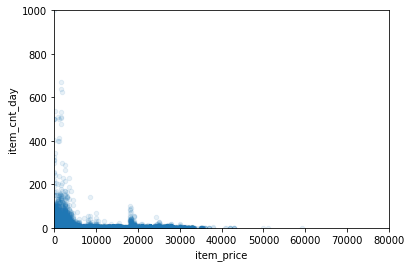

In [28]:
df_train.plot(kind = "scatter", x = "item_price", y="item_cnt_day",alpha = 0.1, xlim=(0,80000),ylim=(0,1000))

In [29]:
#df_train.corr()
#corr
#date_block_num , item_price = 0.1
#item_id, item_price = -0.13


In [30]:
df_train['date_block_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], dtype=int64)

# 가설
1. 지역의 영향 (대도시권, 중소규모 도시)

2. On, Off line 매장 구분의 영향

3. 상품 카테고리별 영향

4. 프로모션의 영향

### 1. 지역의 영향
* shop_name에서 지역명만 추출

In [31]:
df_shop.head()

,shop_name,shop_id
0,"Yakutsk Ordzhonikidze, 56 francs",0
1,"Yakutsk TC ""Central"" franc",1
2,"Adygea Shopping Center ""Mega""",2
3,"Balashikha TRK ""October-Kinomir""",3
4,"Volzhsky shopping center ""Volga Mall""",4


In [32]:
df_shop[['shop_name']].head()

,shop_name
0,"Yakutsk Ordzhonikidze, 56 francs"
1,"Yakutsk TC ""Central"" franc"
2,"Adygea Shopping Center ""Mega"""
3,"Balashikha TRK ""October-Kinomir"""
4,"Volzhsky shopping center ""Volga Mall"""


In [33]:
shop_name_split = df_shop['shop_name'].str.split(' ',expand=True)
shop_name_split.head()

,0,1,2,3,4,5,6
0,Yakutsk,"Ordzhonikidze,",56,francs,None,None,None
1,Yakutsk,TC,"""Central""",franc,None,None,None
2,Adygea,Shopping,Center,"""Mega""",None,None,None
3,Balashikha,TRK,"""October-Kinomir""",None,None,None,None
4,Volzhsky,shopping,center,"""Volga","Mall""",None,None


In [34]:
location_name = shop_name_split[[0]]
location_name.rename(columns={0:'location_name'},inplace=True)
location_name.head()

c:\users\cch88\miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,location_name
0,Yakutsk
1,Yakutsk
2,Adygea
3,Balashikha
4,Volzhsky


In [35]:
df_shop_new=pd.concat([df_shop,location_name],axis=1)
df_shop_new.head()

,shop_name,shop_id,location_name
0,"Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk
1,"Yakutsk TC ""Central"" franc",1,Yakutsk
2,"Adygea Shopping Center ""Mega""",2,Adygea
3,"Balashikha TRK ""October-Kinomir""",3,Balashikha
4,"Volzhsky shopping center ""Volga Mall""",4,Volzhsky


#### Russia population Census 참고
* 2014년 census 정보만 가져올것임
* https://gist.githubusercontent.com/logvik/cf787bda80a8aa125c84/raw/2749e1679670baad67fd9361feb7cb5437f2d8ad/population.csv csv 파일
* Oblast,Krai는 주를 의미 (람다 식의 적용으로 제거)

In [36]:
df_population = pd.read_csv('population.csv')
df_population.head()

,Code,Name,year1959,year1970,year1979,year1989,year2002,year2010,year2013,year2014
0,MOW,Moscow,5085581,7061008,8010954,8967232,10382754,11503501,11979529,12108257
1,MOS,Moscow Oblast,5863003,5774529,6359385,6693623,6618538,7095120,7048084,7133620
2,KDA,Krasnodar Krai,3477809,4124163,4410331,4680560,5125221,5226647,5330181,5404273
3,SPE,St. Petersburg,3321196,3949501,4588183,5023506,4661219,4879566,5028000,5131942
4,SVE,Sverdlovsk Oblast,4044416,4319741,4453491,4716768,4486214,4297747,4315830,4320677


In [37]:
df_population.drop(df_population.columns[2:-1], axis=1, inplace= True)
df_population.drop(['Code'],axis=1,inplace=True)

In [38]:
df_population.head()

,Name,year2014
0,Moscow,12108257
1,Moscow Oblast,7133620
2,Krasnodar Krai,5404273
3,St. Petersburg,5131942
4,Sverdlovsk Oblast,4320677


In [39]:
# df_population['Name'][1].replace(' Oblast','')

re = lambda x : x.replace(' Oblast','')
re_2 = lambda x : x.replace(' Krai','')
df_population['Name'] = df_population['Name'].apply(re)
df_population['Name'] = df_population['Name'].apply(re_2)
df_population.drop(1,inplace=True)# 모스크바 도심과 광역 중 도심만 선택

In [40]:
df_population.head()

,Name,year2014
0,Moscow,12108257
2,Krasnodar,5404273
3,St. Petersburg,5131942
4,Sverdlovsk,4320677
5,Rostov,4245532


#### df_shop_new와 df_population merge
* 지역명 기준으로 merge 23개 지역이 인구수 Nan값 데이터 파일에 도시명과 지역명이 상이한 경우임

In [41]:
df_shop_new_2 = pd.merge(df_shop_new, df_population, left_on='location_name', right_on='Name',how='left')
df_shop_new_2.head()

,shop_name,shop_id,location_name,Name,year2014
0,"Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,NaN,nan
1,"Yakutsk TC ""Central"" franc",1,Yakutsk,NaN,nan
2,"Adygea Shopping Center ""Mega""",2,Adygea,NaN,nan
3,"Balashikha TRK ""October-Kinomir""",3,Balashikha,NaN,nan
4,"Volzhsky shopping center ""Volga Mall""",4,Volzhsky,NaN,nan


In [42]:
df_shop_new_2[df_shop_new_2['year2014'].isnull()]

,shop_name,shop_id,location_name,Name,year2014
0,"Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,NaN,nan
1,"Yakutsk TC ""Central"" franc",1,Yakutsk,NaN,nan
2,"Adygea Shopping Center ""Mega""",2,Adygea,NaN,nan
3,"Balashikha TRK ""October-Kinomir""",3,Balashikha,NaN,nan
4,"Volzhsky shopping center ""Volga Mall""",4,Volzhsky,NaN,nan
9,Outbound Trade,9,Outbound,NaN,nan
10,Zhukovsky Str. Chkalov 39m?,10,Zhukovsky,NaN,nan
11,Zhukovsky Str. Chkalov 39 m²,11,Zhukovsky,NaN,nan
12,Online shop Emergency,12,Online,NaN,nan
13,"Kazan Shopping Center ""Bahetle""",13,Kazan,NaN,nan


In [43]:
df_shop_new_2.loc[[42,43],['year2014']]=5131942
#상트 페테르 부르크 표기 차이

df_shop_new_2.loc[[12,55],['year2014']]=10000000 
#러시아 인터넷 유저 8천만 중 1/8

df_shop_new_2.loc[[9],['year2014']]=5000000


In [44]:
df_shop_new_2[df_shop_new_2['year2014'].isnull()] # 추가 인구 결측치 지역은 딕트 형태로 태깅후 어플라이 시키겠음

,shop_name,shop_id,location_name,Name,year2014
0,"Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,NaN,nan
1,"Yakutsk TC ""Central"" franc",1,Yakutsk,NaN,nan
2,"Adygea Shopping Center ""Mega""",2,Adygea,NaN,nan
3,"Balashikha TRK ""October-Kinomir""",3,Balashikha,NaN,nan
4,"Volzhsky shopping center ""Volga Mall""",4,Volzhsky,NaN,nan
10,Zhukovsky Str. Chkalov 39m?,10,Zhukovsky,NaN,nan
11,Zhukovsky Str. Chkalov 39 m²,11,Zhukovsky,NaN,nan
13,"Kazan Shopping Center ""Bahetle""",13,Kazan,NaN,nan
14,"Kazan Shopping Center ""ParkHouse"" II",14,Kazan,NaN,nan
16,"Kolomna shopping center ""Rio""",16,Kolomna,NaN,nan


In [45]:
non_pop_index = df_shop_new_2[df_shop_new_2['year2014'].isnull()].index.tolist()

In [46]:
df_shop_new_2[df_shop_new_2['year2014'].isnull()]['location_name'].unique().tolist()

['Yakutsk',
 'Adygea',
 'Balashikha',
 'Volzhsky',
 'Zhukovsky',
 'Kazan',
 'Kolomna',
 'Mytischi',
 'N.Novgorod',
 'RostovNaDonu',
 'Sergiev',
 'Surgut',
 'Ufa',
 'Khimki',
 'Chekhov']

In [47]:
population_tag = {
'Yakutsk': 269601,
'Adygea':444403,
'Balashikha':215494,
'Volzhsky':314255,
'Zhukovsky':104736 ,
'Kazan':1143535,
'Kolomna':144589 ,
'Mytischi':173160 ,
'N.Novgorod':1250619,
'RostovNaDonu':1089261 ,
'Sergiev':111179 ,
'Surgut': 341000,
'Ufa': 1023000,
'Khimki':207425 ,
'Chekhov':60720
}

In [48]:
df_shop_new_2.loc[non_pop_index,['year2014']]=df_shop_new_2[df_shop_new_2['year2014'].isnull()].location_name.map(population_tag)

In [49]:
df_shop_new_2[df_shop_new_2['year2014'].isnull()]

,shop_name,shop_id,location_name,Name,year2014


In [50]:
df_shop_new_2.head()

,shop_name,shop_id,location_name,Name,year2014
0,"Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,NaN,269601.00
1,"Yakutsk TC ""Central"" franc",1,Yakutsk,NaN,269601.00
2,"Adygea Shopping Center ""Mega""",2,Adygea,NaN,444403.00
3,"Balashikha TRK ""October-Kinomir""",3,Balashikha,NaN,215494.00
4,"Volzhsky shopping center ""Volga Mall""",4,Volzhsky,NaN,314255.00


In [51]:
df_train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [52]:
df_train_location = pd.merge(df_train,df_shop_new_2,left_on = 'shop_id', right_on='shop_id', how='left')
df_train_location

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,location_name,Name,year2014
0,02.01.2013,0,59,22154,999.00,1.00,"Yaroslavl Shopping center ""Altair""",Yaroslavl,Yaroslavl,1271766.00
1,03.01.2013,0,25,2552,899.00,1.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00
2,05.01.2013,0,25,2552,899.00,-1.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00
3,06.01.2013,0,25,2554,1709.05,1.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00
4,15.01.2013,0,25,2555,1099.00,1.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00
5,10.01.2013,0,25,2564,349.00,1.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00
6,02.01.2013,0,25,2565,549.00,1.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00
7,04.01.2013,0,25,2572,239.00,1.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00
8,11.01.2013,0,25,2572,299.00,1.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00
9,03.01.2013,0,25,2573,299.00,3.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00


In [53]:
df_train_location.drop(['date'],inplace=True,axis=1)

In [54]:
df_train_location.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,location_name,Name,year2014
0,0,59,22154,999.00,1.00,"Yaroslavl Shopping center ""Altair""",Yaroslavl,Yaroslavl,1271766.00
1,0,25,2552,899.00,1.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00
2,0,25,2552,899.00,-1.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00
3,0,25,2554,1709.05,1.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00
4,0,25,2555,1099.00,1.00,"Moscow TRK ""Atrium""",Moscow,Moscow,12108257.00


In [55]:
df_train_location.drop(['Name'],axis=1,inplace=True)

In [56]:
df_train_location[df_train_location['shop_id']==0][df_train_location['item_id']==32]

c:\users\cch88\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,location_name,year2014
40085,0,0,32,221.00,2.00,"Yakutsk Ordzhonikidze, 56 francs",Yakutsk,269601.00
40086,0,0,32,221.00,2.00,"Yakutsk Ordzhonikidze, 56 francs",Yakutsk,269601.00
40087,0,0,32,221.00,1.00,"Yakutsk Ordzhonikidze, 56 francs",Yakutsk,269601.00
40088,0,0,32,221.00,1.00,"Yakutsk Ordzhonikidze, 56 francs",Yakutsk,269601.00
173447,1,0,32,221.00,1.00,"Yakutsk Ordzhonikidze, 56 francs",Yakutsk,269601.00
173448,1,0,32,221.00,2.00,"Yakutsk Ordzhonikidze, 56 francs",Yakutsk,269601.00
173449,1,0,32,221.00,2.00,"Yakutsk Ordzhonikidze, 56 francs",Yakutsk,269601.00
173450,1,0,32,221.00,1.00,"Yakutsk Ordzhonikidze, 56 francs",Yakutsk,269601.00
173452,1,0,32,221.00,2.00,"Yakutsk Ordzhonikidze, 56 francs",Yakutsk,269601.00
173453,1,0,32,221.00,1.00,"Yakutsk Ordzhonikidze, 56 francs",Yakutsk,269601.00


In [57]:
df_item_cnt_month=df_train_location.groupby(['shop_id','item_id','date_block_num']).agg({
                                                                  'item_cnt_day' : sum})

In [58]:
df_item_cnt_month.head()

item_cnt_day
shop_id item_id date_block_num              
0       30      1                      31.00
        31      1                      11.00
        32      0                       6.00
                1                      10.00
        33      0                       3.00

In [59]:
df_item_cnt_month.reset_index(inplace=True)

In [60]:
df_item_cnt_month.head()

,shop_id,item_id,date_block_num,item_cnt_day
0,0,30,1,31.00
1,0,31,1,11.00
2,0,32,0,6.00
3,0,32,1,10.00
4,0,33,0,3.00


In [61]:
df_item_cnt_month.rename(columns={'item_cnt_day': 'item_cnt_month'},inplace=True)
df_item_cnt_month.head()

,shop_id,item_id,date_block_num,item_cnt_month
0,0,30,1,31.00
1,0,31,1,11.00
2,0,32,0,6.00
3,0,32,1,10.00
4,0,33,0,3.00


In [62]:
df_train_merge=pd.merge(df_train_location, df_item_cnt_month, 
         left_on=['shop_id','item_id','date_block_num'],
         right_on=['shop_id','item_id','date_block_num'],
        how ='left')

In [63]:
df_train_merge.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,location_name,year2014,item_cnt_month
0,0,59,22154,999.00,1.00,"Yaroslavl Shopping center ""Altair""",Yaroslavl,1271766.00,1.00
1,0,25,2552,899.00,1.00,"Moscow TRK ""Atrium""",Moscow,12108257.00,0.00
2,0,25,2552,899.00,-1.00,"Moscow TRK ""Atrium""",Moscow,12108257.00,0.00
3,0,25,2554,1709.05,1.00,"Moscow TRK ""Atrium""",Moscow,12108257.00,1.00
4,0,25,2555,1099.00,1.00,"Moscow TRK ""Atrium""",Moscow,12108257.00,1.00


In [64]:
df_train_fin=df_train_merge.groupby(['shop_id','item_id','date_block_num']).agg({'item_price':'mean',
                                                                                 'shop_name' : 'max',
                                                                                 'location_name' : 'max',
                                                                                 'year2014':'mean',
                                                                                 'item_cnt_day' : max,
                                                                                 'item_cnt_month' : max})
df_train_fin.head()

location_name  \
shop_id item_id date_block_num                 
0       30      1                    Yakutsk   
        31      1                    Yakutsk   
        32      0                    Yakutsk   
                1                    Yakutsk   
        33      0                    Yakutsk   

                                                       shop_name  \
shop_id item_id date_block_num                                     
0       30      1               Yakutsk Ordzhonikidze, 56 francs   
        31      1               Yakutsk Ordzhonikidze, 56 francs   
        32      0               Yakutsk Ordzhonikidze, 56 francs   
                1               Yakutsk Ordzhonikidze, 56 francs   
        33      0               Yakutsk Ordzhonikidze, 56 francs   

                                item_cnt_day  item_price  item_cnt_month  \
shop_id item_id date_block_num                                             
0       30      1                       9.00      265.00           31.00   
        31      1                       3.00      434.00           11.00   
        32      0                       2.00      221.00            6.00   
                1                       2.00      221.00           10.00   
        33      0                       1.00      347.00            3.00   

                                year2014  
shop_id item_id date_block_num            
0       30      1              269601.00  
        31      1              269601.00  
        32      0              269601.00  
                1              269601.00  
        33      0              269601.00

In [65]:
df_train_fin.reset_index(inplace=True)

In [66]:
df_train_fin.drop(['item_cnt_day'],inplace=True,axis=1)

In [67]:
df_train_fin.head()

,shop_id,item_id,date_block_num,location_name,shop_name,item_price,item_cnt_month,year2014
0,0,30,1,Yakutsk,"Yakutsk Ordzhonikidze, 56 francs",265.00,31.00,269601.00
1,0,31,1,Yakutsk,"Yakutsk Ordzhonikidze, 56 francs",434.00,11.00,269601.00
2,0,32,0,Yakutsk,"Yakutsk Ordzhonikidze, 56 francs",221.00,6.00,269601.00
3,0,32,1,Yakutsk,"Yakutsk Ordzhonikidze, 56 francs",221.00,10.00,269601.00
4,0,33,0,Yakutsk,"Yakutsk Ordzhonikidze, 56 francs",347.00,3.00,269601.00


In [68]:
df_train_fin.columns

Index(['shop_id', 'item_id', 'date_block_num', 'location_name', 'shop_name',
       'item_price', 'item_cnt_month', 'year2014'],
      dtype='object')

In [69]:
df_train_fin=pd.DataFrame(df_train_fin, columns=['shop_id', 'item_id', 'date_block_num', 'location_name','shop_name', 'year2014',
       'item_price','item_cnt_month'])
df_train_fin.head()

,shop_id,item_id,date_block_num,location_name,shop_name,year2014,item_price,item_cnt_month
0,0,30,1,Yakutsk,"Yakutsk Ordzhonikidze, 56 francs",269601.00,265.00,31.00
1,0,31,1,Yakutsk,"Yakutsk Ordzhonikidze, 56 francs",269601.00,434.00,11.00
2,0,32,0,Yakutsk,"Yakutsk Ordzhonikidze, 56 francs",269601.00,221.00,6.00
3,0,32,1,Yakutsk,"Yakutsk Ordzhonikidze, 56 francs",269601.00,221.00,10.00
4,0,33,0,Yakutsk,"Yakutsk Ordzhonikidze, 56 francs",269601.00,347.00,3.00


In [71]:
#shop_name과 shop_id는 동일한 성격들 지니기에 shop_name 드랍
df_train_fin.drop(['shop_name'],axis=1,inplace=True)

In [74]:
df_train_fin.head()

,shop_id,item_id,date_block_num,location_name,year2014,item_price,item_cnt_month
0,0,30,1,Yakutsk,269601.00,265.00,31.00
1,0,31,1,Yakutsk,269601.00,434.00,11.00
2,0,32,0,Yakutsk,269601.00,221.00,6.00
3,0,32,1,Yakutsk,269601.00,221.00,10.00
4,0,33,0,Yakutsk,269601.00,347.00,3.00


In [75]:
train_data = df_train_fin.as_matrix()
train_data[:5]

array([[0, 30, 1, 'Yakutsk', 269601.0, 265.0, 31.0],
       [0, 31, 1, 'Yakutsk', 269601.0, 434.0, 11.0],
       [0, 32, 0, 'Yakutsk', 269601.0, 221.0, 6.0],
       [0, 32, 1, 'Yakutsk', 269601.0, 221.0, 10.0],
       [0, 33, 0, 'Yakutsk', 269601.0, 347.0, 3.0]], dtype=object)

In [73]:
df_train_fin.corr()

,shop_id,item_id,date_block_num,year2014,item_price,item_cnt_month
shop_id,1.00,0.02,0.02,-0.24,-0.02,0.00
item_id,0.02,1.00,-0.01,0.02,-0.12,-0.01
date_block_num,0.02,-0.01,1.00,-0.01,0.09,0.00
year2014,-0.24,0.02,-0.01,1.00,-0.01,0.03
item_price,-0.02,-0.12,0.09,-0.01,1.00,0.02
item_cnt_month,0.00,-0.01,0.00,0.03,0.02,1.00


### Sckit Learn- Label Encoding

In [76]:
from sklearn import preprocessing

In [84]:
def label_encoding(data, columns):
    label_encoder_list=[]
    for column_index in columns:
        le = preprocessing.LabelEncoder()
        le.fit(data[:,column_index])
        
        data[:,column_index]=le.transform(data[:,column_index])
        label_encoder_list.append(le)
        
        del le
        
    
    return label_encoder_list, data
        
    
    

In [85]:
label_column = [0,1,2,3] # shop_id, item_id, date_block_num, location_name

label_encoder_list,labeling_data = label_encoding(train_data,label_column)

In [95]:
labeling_data[:10]

array([[0, 30, 1, 28, 269601.0, 265.0, 31.0],
       [0, 31, 1, 28, 269601.0, 434.0, 11.0],
       [0, 32, 0, 28, 269601.0, 221.0, 6.0],
       [0, 32, 1, 28, 269601.0, 221.0, 10.0],
       [0, 33, 0, 28, 269601.0, 347.0, 3.0],
       [0, 33, 1, 28, 269601.0, 347.0, 3.0],
       [0, 35, 0, 28, 269601.0, 247.0, 1.0],
       [0, 35, 1, 28, 269601.0, 247.0, 14.0],
       [0, 36, 1, 28, 269601.0, 357.0, 1.0],
       [0, 40, 1, 28, 269601.0, 127.0, 1.0]], dtype=object)

In [101]:
label_encoder_list

[LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()]

### Numeric type - > One hot encoding
*  <1609124x21932 sparse matrix of type '<class 'numpy.float64'>'
	with 6436496 stored elements in Compressed Sparse Row format>
* Memorry Error 발생


* scipy의 csr_matrix 모듈 호출 필요(Sparse한 매트릭스 처리)

In [114]:
one_hot_enc = preprocessing.OneHotEncoder()
one_hot_enc.fit(labeling_data[:,:4])

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [115]:
one_hot_enc.n_values_ , one_hot_enc.feature_indices_, one_hot_enc.active_features_
#

(array([   60, 21807,    34,    31]),
 array([    0,    60, 21867, 21901, 21932], dtype=int32),
 array([    0,     1,     2, ..., 21929, 21930, 21931], dtype=int64))

In [116]:
one_hot_labeling_data = one_hot_enc.transform(labeling_data[:,:4]).toarray()

MemoryError: 

In [120]:
type(one_hot_labeling_data)

scipy.sparse.csr.csr_matrix

* csr_matrix(shop_id, item_id, date_block_num,location)와  
피쳐스케일링한 넘파이 어레이(year2014, item_price)     
hstack

### Feature scaling

* 
* Min-Max의 값을 알 수 있기에 Min-Max 적용

In [121]:
labeling_data[:,4:]

array([[269601.0, 265.0, 31.0],
       [269601.0, 434.0, 11.0],
       [269601.0, 221.0, 6.0],
       ..., 
       [1271766.0, 299.0, 1.0],
       [1271766.0, 299.0, 2.0],
       [1271766.0, 299.0, 1.0]], dtype=object)

In [122]:
minmax_scale = preprocessing.MinMaxScaler().fit(labeling_data[:,4:6])
minmax_data = minmax_scale.transform(labeling_data[:,4:6])

minmax_data[:5]

c:\users\cch88\miniconda3\envs\ml_python\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[ 0.01733807,  0.00086015],
       [ 0.01733807,  0.00140889],
       [ 0.01733807,  0.00071729],
       [ 0.01733807,  0.00071729],
       [ 0.01733807,  0.0011264 ]])

In [124]:
from scipy.sparse import csr_matrix

In [136]:
print(minmax_data.shape,  labeling_data[:,-1].reshape(-1,1).shape )

(1609124, 2) (1609124, 1)


In [139]:
non_csr_data = np.concatenate((minmax_data, labeling_data[:,-1].reshape(-1,1)),
                              axis=1)
non_csr_data

array([[0.017338066693632068, 0.0008601535080648605, 31.0],
       [0.017338066693632068, 0.0014088905993900707, 11.0],
       [0.017338066693632068, 0.0007172870464180602, 6.0],
       ..., 
       [0.10052228932768581, 0.000970550319337388, 1.0],
       [0.10052228932768581, 0.000970550319337388, 2.0],
       [0.10052228932768581, 0.000970550319337388, 1.0]], dtype=object)

In [140]:
import scipy.sparse as sp

In [153]:
csr_mat = csr_matrix((1609124, 3), dtype=np.float32)

In [155]:
csr_mat.toarray()

numpy.ndarray

In [157]:
non_csr_data.flatten()

array([0.017338066693632068, 0.0008601535080648605, 31.0, ...,
       0.10052228932768581, 0.000970550319337388, 1.0], dtype=object)

In [158]:
non_csr_data # CSR_data 생성해야함

AttributeError: 'numpy.ndarray' object has no attribute 'index'